### EN3160 - Assignment 03 on Neural Networks

Listing 1 shows the code for a single dense layer network with manually computed forward path and
backpropagations. Do the following changes

In [20]:
#importing the libraries
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [21]:
# Data loading
transform = transforms . Compose ([transforms.ToTensor ( ),transforms.Normalize ((0.5,0.5,0.5),(0.5,0.5,0.5))])
batch_size = 50
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True , transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True , num_workers=2)
testset = torchvision.datasets.CIFAR10(root= './data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset,batch_size=batch_size, shuffle=False , num_workers=2)
classes = ('plane','car','bird','cat','deer','dog','frog','horse','ship','truck')

Files already downloaded and verified
Files already downloaded and verified


In [22]:
#Define the network parameters

Din = 3*32*32 #Input size(flattened CIFAR=10 image size)
K = 10 # Output size (number of classes in CIFAR=10)
std = 1e-5

In [23]:
# Initialize weights and biases
w = torch.randn(Din,K)*std # One layer: directly map input to output
b = torch.zeros(K)

In [24]:
# Hyperparameters
iterations = 20
lr = 2e-6 # Learning rate
lr_decay = 0.9 # Learning rate decay
reg = 0 # Regularization
loss_history = []

In [25]:
# 3. Training Loop
for t in range(iterations):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # Get inputs and labels
        inputs, labels = data
        Ntr = inputs.shape[0]  # Batch size
        x_train = inputs.view(Ntr, -1)  # Flatten input to (Ntr, Din)
        y_train_onehot = nn.functional.one_hot(labels, K).float()  # Convert labels to one-hot
        
        # Forward pass
        y_pred = x_train.mm(w) + b  # Output layer activation
        
        # Loss calculation (Mean Squared Error with regularization)
        loss = (1/Ntr) * torch.sum((y_pred - y_train_onehot)**2) + reg * torch.sum(w**2)
        loss_history.append(loss.item())
        running_loss += loss.item()
        
        # Backpropagation
        dy_pred = (2.0/Ntr) * (y_pred - y_train_onehot)
        dw = x_train.t().mm(dy_pred) + reg * w
        db = dy_pred.sum(dim=0)
        
        # Parameter update
        w -= lr * dw
        b -= lr * db
    
    # Print loss for every epoch
    if t % 1 == 0:
        print(f"Epoch {t+1}/{iterations}, Loss: {running_loss/len(trainloader)}")
    
    # Learning rate decay
    lr *= lr_decay

Epoch 1/20, Loss: 0.9769225004315376
Epoch 2/20, Loss: 0.9498437886834145
Epoch 3/20, Loss: 0.9361035345792771
Epoch 4/20, Loss: 0.9275577847957611
Epoch 5/20, Loss: 0.9216207546591759
Epoch 6/20, Loss: 0.9172168412804603
Epoch 7/20, Loss: 0.9138029552102089
Epoch 8/20, Loss: 0.9110745660066605
Epoch 9/20, Loss: 0.9088440780043602
Epoch 10/20, Loss: 0.9069907270669937
Epoch 11/20, Loss: 0.9054297558665275
Epoch 12/20, Loss: 0.9041023790836334
Epoch 13/20, Loss: 0.9029635102152824
Epoch 14/20, Loss: 0.9019801720380783
Epoch 15/20, Loss: 0.9011258813738823
Epoch 16/20, Loss: 0.9003806881308556
Epoch 17/20, Loss: 0.8997280470728874
Epoch 18/20, Loss: 0.8991543977856636
Epoch 19/20, Loss: 0.8986488178968429
Epoch 20/20, Loss: 0.8982021573185921


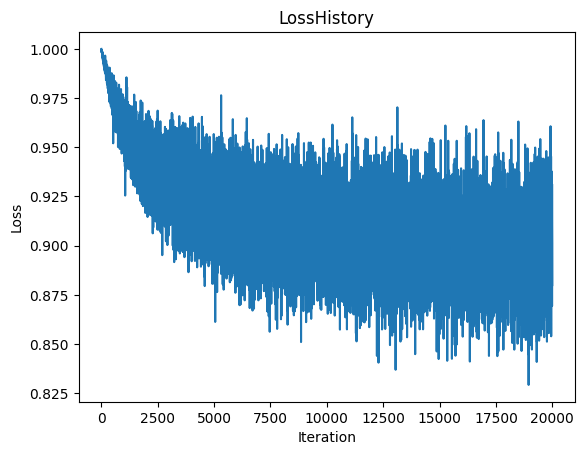

In [26]:
#4. Plotting the Loss History
plt. plot (loss_history)
plt. title ("LossHistory")
plt.xlabel ("Iteration")
plt.ylabel ("Loss")
plt.show()

In [27]:
 # 5. Calculate Accuracy on Training Set
correct_train = 0
total_train = 0
with torch.no_grad():
    for data in trainloader :
        inputs , labels = data
        Ntr = inputs.shape[0]
        x_train = inputs.view(Ntr,-1)
        y_train_onehot = nn.functional.one_hot(labels,K).float()

        # Forward pass
        y_train_pred = x_train.mm(w)+b
        predicted_train = torch.argmax(y_train_pred , dim=1)
        total_train += labels.size(0)
        correct_train += (predicted_train == labels).sum().item()

train_acc = 100 * correct_train/total_train
print(f"Training accuracy : { train_acc :.2f}%")

Training accuracy : 32.21%


In [28]:
# 6. Calculate Accuracy on Test Set
correct_test = 0
total_test = 0
with torch.no_grad():
    for data in testloader :
        inputs , labels = data
        Nte = inputs.shape[0]
        x_test = inputs.view(Nte, -1)
        y_test_onehot = nn. functional .one_hot(labels , K). float ()
        
        # Forward pass
        y_test_pred = x_test .mm(w) + b
        predicted_test = torch .argmax(y_test_pred , dim=1)
        total_test += labels . size (0)
        correct_test += (predicted_test == labels ).sum(). item()
test_acc = 100 * correct_test / total_test
print( f"Test accuracy : {test_acc:.2f}%")

Test accuracy : 32.39%


Adding 100 dense layers

In [29]:
# Define the number of hidden nodes and output classes
H = 100  # Number of hidden nodes
K = 10   # Output dimension (number of classes)

lr = 0.01
lr_decay = 0.99
reg = 1e-5
iterations = 20  # Number of epochs
loss_history = []

# Initialize weights and biases based on the first batch to get input dimension
dataiter = iter(trainloader)
inputs, labels = next(dataiter)
Ntr = inputs.shape[0]  # Batch size
Din = inputs.view(Ntr, -1).shape[1]  # Input dimension (flattened image size)

# Initialize weights and biases for input to hidden layer
w1 = torch.randn(Din, H) * 0.01  # Input to hidden layer weights
b1 = torch.zeros(H)  # Hidden layer bias

# Initialize weights and biases for hidden to output layer
w2 = torch.randn(H, K) * 0.01  # Hidden to output layer weights
b2 = torch.zeros(K)  # Output layer bias

# Training loop
for t in range(iterations):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # Get inputs and labels from the current batch
        inputs, labels = data
        Ntr = inputs.shape[0]  # Batch size
        x_train = inputs.view(Ntr, -1)  # Flatten input to (Ntr, Din)
        y_train_onehot = nn.functional.one_hot(labels, K).float()  # Convert labels to one-hot encoding
        
        # Forward pass
        # Input to hidden layer
        hidden = x_train.mm(w1) + b1  # (Ntr, H)
        hidden_activated = torch.sigmoid(hidden)  # Apply sigmoid activation
        
        # Hidden to output layer
        y_pred = hidden_activated.mm(w2) + b2  # Output layer activation
        
        # Loss calculation (Mean Squared Error with regularization)
        loss = (1/Ntr) * torch.sum((y_pred - y_train_onehot)**2) + reg * (torch.sum(w1**2) + torch.sum(w2**2))
        loss_history.append(loss.item())
        running_loss += loss.item()
        
        # Backpropagation
        # Gradients for output layer
        dy_pred = (2.0/Ntr) * (y_pred - y_train_onehot)  # (Ntr, K)
        dw2 = hidden_activated.t().mm(dy_pred) + reg * w2  # (H, K)
        db2 = dy_pred.sum(dim=0)  # (K,)
        
        # Gradients for hidden layer
        dhidden_activated = dy_pred.mm(w2.t())  # (Ntr, H)
        dhidden = dhidden_activated * (hidden_activated * (1 - hidden_activated))  # Sigmoid derivative
        
        dw1 = x_train.t().mm(dhidden) + reg * w1  # (Din, H)
        db1 = dhidden.sum(dim=0)  # (H,)
        
        # Parameter update
        w1 -= lr * dw1
        b1 -= lr * db1
        w2 -= lr * dw2
        b2 -= lr * db2
    
    # Print loss for every epoch
    if t % 1 == 0:
        print(f"Epoch {t+1}/{iterations}, Loss: {running_loss/len(trainloader)}")
    
    # Learning rate decay
    lr *= lr_decay


Epoch 1/20, Loss: 0.851787113904953
Epoch 2/20, Loss: 0.8202801596522331
Epoch 3/20, Loss: 0.8085968325138092
Epoch 4/20, Loss: 0.8020154830813407
Epoch 5/20, Loss: 0.796253532409668
Epoch 6/20, Loss: 0.792108782529831
Epoch 7/20, Loss: 0.7879820963740349
Epoch 8/20, Loss: 0.7843282442688942
Epoch 9/20, Loss: 0.7813208178877831
Epoch 10/20, Loss: 0.7780492696166038
Epoch 11/20, Loss: 0.7751824579238892
Epoch 12/20, Loss: 0.7721113324165344
Epoch 13/20, Loss: 0.7695873239636422
Epoch 14/20, Loss: 0.7664711076021195
Epoch 15/20, Loss: 0.7638324437737465
Epoch 16/20, Loss: 0.761307135462761
Epoch 17/20, Loss: 0.7589216220974923
Epoch 18/20, Loss: 0.7568604753613472
Epoch 19/20, Loss: 0.7543327162265777
Epoch 20/20, Loss: 0.7520926458835602


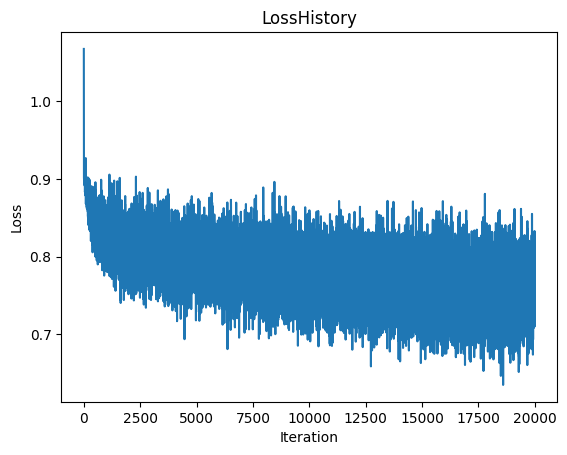

In [30]:
#4. Plotting the Loss History
plt. plot (loss_history)
plt. title ("LossHistory")
plt.xlabel ("Iteration")
plt.ylabel ("Loss")
plt.show()

In [31]:
 # 5. Calculate Accuracy on Training Set

correct_train = 0
total_train = 0
with torch.no_grad():
    for data in trainloader :
        inputs , labels = data
        Ntr = inputs.shape[0]
        x_train = inputs.view(Ntr,-1)
        y_train_onehot = nn.functional.one_hot(labels,K).float()

        # Forward pass
        y_train_pred = x_train.mm(w)+b
        predicted_train = torch.argmax(y_train_pred , dim=1)
        total_train += labels.size(0)
        correct_train += (predicted_train == labels).sum().item()

train_acc = 100 * correct_train/total_train
print(f"Training accuracy : { train_acc :.2f}%")

Training accuracy : 32.21%


In [32]:
# 6. Calculate Accuracy on Test Set
correct_test = 0
total_test = 0
with torch.no_grad():
    for data in testloader :
        inputs , labels = data
        Nte = inputs.shape[0]
        x_test = inputs.view(Nte, -1)
        y_test_onehot = nn. functional .one_hot(labels , K). float ()
        
        # Forward pass
        y_test_pred = x_test .mm(w) + b
        predicted_test = torch .argmax(y_test_pred , dim=1)
        total_test += labels . size (0)
        correct_test += (predicted_test == labels ).sum(). item()
test_acc = 100 * correct_test / total_test
print( f"Test accuracy : {test_acc:.2f}%")

Test accuracy : 32.39%


Adding Cross-Entropy Loss

In [33]:
# Define the number of hidden nodes and output classes
H = 100  # Number of hidden nodes
K = 10   # Output dimension (number of classes)

# Learning rate and regularization parameters
lr = 0.01
lr_decay = 0.99
reg = 1e-5
iterations = 10  # Number of epochs
loss_history = []

# Initialize weights and biases based on the first batch to get input dimension
dataiter = iter(trainloader)
inputs, labels = next(dataiter)
Ntr = inputs.shape[0]  # Batch size
Din = inputs.view(Ntr, -1).shape[1]  # Input dimension (flattened image size)

# Initialize weights and biases for input to hidden layer
w1 = torch.randn(Din, H) * 0.01  # Input to hidden layer weights
b1 = torch.zeros(H)  # Hidden layer bias

# Initialize weights and biases for hidden to output layer
w2 = torch.randn(H, K) * 0.01  # Hidden to output layer weights
b2 = torch.zeros(K)  # Output layer bias

# Training loop
for t in range(iterations):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # Get inputs and labels from the current batch
        inputs, labels = data
        Ntr = inputs.shape[0]  # Batch size
        x_train = inputs.view(Ntr, -1)  # Flatten input to (Ntr, Din)
        
        # Forward pass
        # Input to hidden layer
        hidden = x_train.mm(w1) + b1  # (Ntr, H)
        hidden_activated = torch.sigmoid(hidden)  # Apply sigmoid activation
        
        # Hidden to output layer
        logits = hidden_activated.mm(w2) + b2  # Output layer (logits)

        # Apply softmax to get probabilities (not necessary for Cross Entropy Loss in PyTorch, but useful for understanding)
        probs = torch.softmax(logits, dim=1)
        
        # Cross Entropy Loss calculation
        # Using PyTorch's built-in log-sum-exp trick for numerical stability
        log_probs = torch.log_softmax(logits, dim=1)  # Log probabilities
        # Loss calculation (Cross Entropy with regularization)
        loss = -log_probs[range(Ntr), labels].mean() + reg * (torch.sum(w1**2) + torch.sum(w2**2))
        
        loss_history.append(loss.item())
        running_loss += loss.item()
        
        # Backpropagation
        # Gradients for output layer (Cross Entropy derivative)
        dy_pred = probs  # Predicted probabilities
        dy_pred[range(Ntr), labels] -= 1  # Subtract 1 from the true class
        dy_pred /= Ntr  # Normalize the gradient
        
        dw2 = hidden_activated.t().mm(dy_pred) + reg * w2  # (H, K)
        db2 = dy_pred.sum(dim=0)  # (K,)
        
        # Gradients for hidden layer
        dhidden_activated = dy_pred.mm(w2.t())  # (Ntr, H)
        dhidden = dhidden_activated * (hidden_activated * (1 - hidden_activated))  # Sigmoid derivative
        
        dw1 = x_train.t().mm(dhidden) + reg * w1  # (Din, H)
        db1 = dhidden.sum(dim=0)  # (H,)
        
        # Parameter update
        w1 -= lr * dw1
        b1 -= lr * db1
        w2 -= lr * dw2
        b2 -= lr * db2
    
    # Print loss for every epoch
    if t % 1 == 0:
        print(f"Epoch {t+1}/{iterations}, Loss: {running_loss/len(trainloader)}")
    
    # Learning rate decay
    lr *= lr_decay


Epoch 1/10, Loss: 2.2092074110507967
Epoch 2/10, Loss: 2.016988755583763
Epoch 3/10, Loss: 1.9326971162557602
Epoch 4/10, Loss: 1.8853012640476228
Epoch 5/10, Loss: 1.8496366056203841
Epoch 6/10, Loss: 1.8209205840826035
Epoch 7/10, Loss: 1.796972531437874
Epoch 8/10, Loss: 1.7770632079839705
Epoch 9/10, Loss: 1.7595374215841293
Epoch 10/10, Loss: 1.7436433819532395


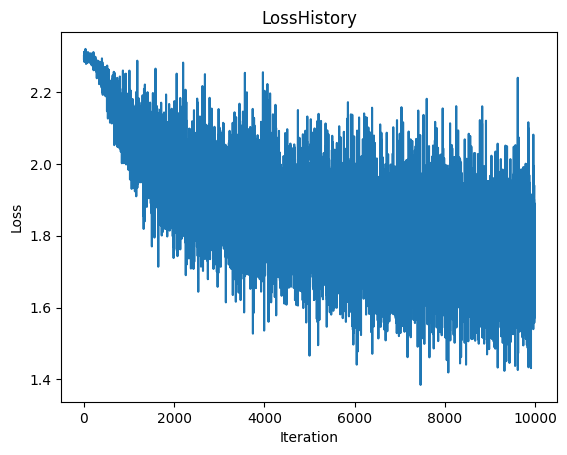

In [34]:
#4. Plotting the Loss History
plt. plot (loss_history)
plt. title ("LossHistory")
plt.xlabel ("Iteration")
plt.ylabel ("Loss")
plt.show()

In [35]:
#5. Calculate Accuracy on Training Set

correct_train = 0
total_train = 0
with torch.no_grad():
    for data in trainloader :
        inputs , labels = data
        Ntr = inputs.shape[0]
        x_train = inputs.view(Ntr,-1)
        y_train_onehot = nn.functional.one_hot(labels,K).float()

        # Forward pass
        y_train_pred = x_train.mm(w)+b
        predicted_train = torch.argmax(y_train_pred , dim=1)
        total_train += labels.size(0)
        correct_train += (predicted_train == labels).sum().item()

train_acc = 100 * correct_train/total_train
print(f"Training accuracy : { train_acc :.2f}%")

Training accuracy : 32.21%


In [36]:
# 6. Calculate Accuracy on Test Set
correct_test = 0
total_test = 0
with torch.no_grad():
    for data in testloader :
        inputs , labels = data
        Nte = inputs.shape[0]
        x_test = inputs.view(Nte, -1)
        y_test_onehot = nn. functional .one_hot(labels , K). float ()
        
        # Forward pass
        y_test_pred = x_test .mm(w) + b
        predicted_test = torch .argmax(y_test_pred , dim=1)
        total_test += labels . size (0)
        correct_test += (predicted_test == labels ).sum(). item()
test_acc = 100 * correct_test / total_test
print( f"Test accuracy : {test_acc:.2f}%")

Test accuracy : 32.39%


###  LeNet-5 network for MNIST using Pytorch

In [1]:
from torchvision import datasets

train_val_dataset = datasets.MNIST(root="./datasets/", train=True, download=True)
test_dataset = datasets.MNIST(root="./datasets/", train=False, download=True)

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1000)>



100.0%


Extracting ./datasets/MNIST\raw\train-images-idx3-ubyte.gz to ./datasets/MNIST\raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1000)>



100.0%


Extracting ./datasets/MNIST\raw\train-labels-idx1-ubyte.gz to ./datasets/MNIST\raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1000)>



100.0%


Extracting ./datasets/MNIST\raw\t10k-images-idx3-ubyte.gz to ./datasets/MNIST\raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1000)>



100.0%

Extracting ./datasets/MNIST\raw\t10k-labels-idx1-ubyte.gz to ./datasets/MNIST\raw



Dataset observation and preparation

In [2]:
#Summary of the dataset
train_val_dataset, test_dataset

(Dataset MNIST
     Number of datapoints: 60000
     Root location: ./datasets/
     Split: Train,
 Dataset MNIST
     Number of datapoints: 10000
     Root location: ./datasets/
     Split: Test)

In [3]:
#Check the class names
class_names = train_val_dataset.classes
class_names

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

In [4]:
img, label = train_val_dataset[0]
img, label

(<PIL.Image.Image image mode=L size=28x28>, 5)

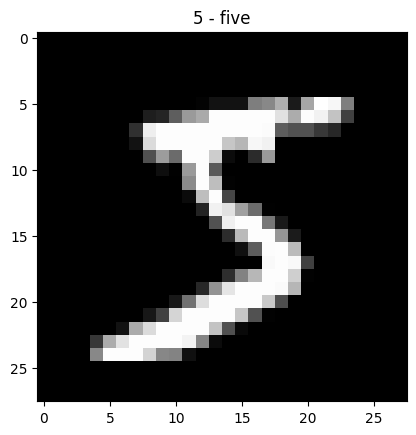

In [5]:
import matplotlib.pyplot as plt

plt.imshow(img, cmap='gray')
plt.title(f"{class_names[label]}");

Visualizing the sample by superimposing the image’s pixels with their corresponding pixel-intensities values.

In [6]:
import numpy as np

def img_pixel_superimpose(img, ax):
    w, h = img.shape
    color_map = plt.cm.get_cmap('gray_r')  # gray_reversed
    ax.imshow(img, cmap='gray')
    for x in range(w):
        for y in range(h):
            color = color_map(img[x][y])
            ax.annotate(str(img[x][y]), xy=(y,x), horizontalalignment='center', verticalalignment='center',
                        color=color)
            plt.axis(False)

C:\Users\ANUSHKA\AppData\Local\Temp\ipykernel_13392\1572773032.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map = plt.cm.get_cmap('gray_r')  # gray_reversed


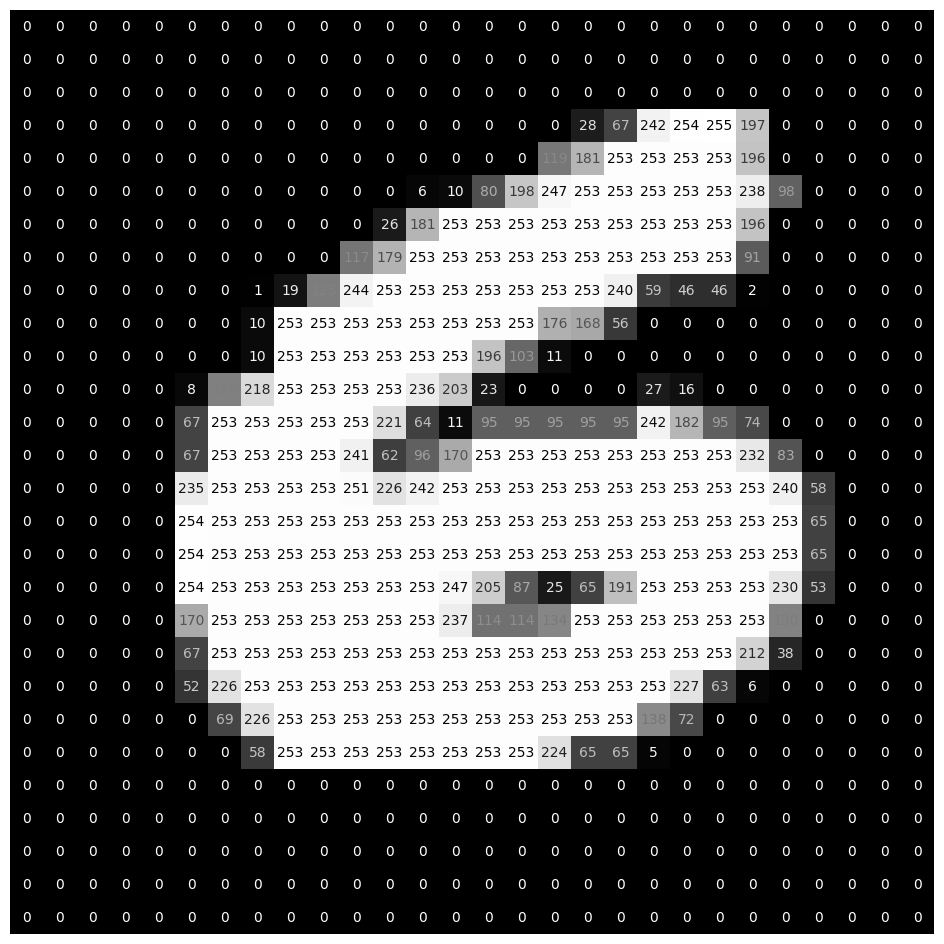

In [14]:
import torch

torch.manual_seed(42) # Set seed for reproducibility

fig = plt.figure(figsize = (12,12)) 
ax0 = fig.add_subplot(1, 1, 1)

rand_ind = torch.randint(0, len(train_val_dataset), size=[1]).item() # Random index

img0 = train_val_dataset.data[rand_ind]
img0 = img0.numpy()
img_pixel_superimpose(img0, ax0)

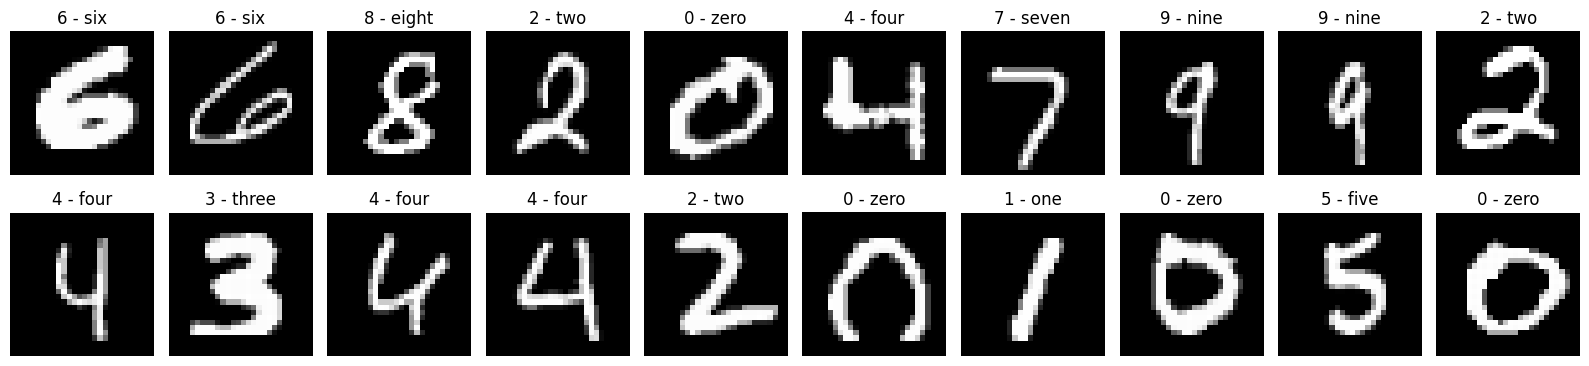

In [15]:
import torch
torch.manual_seed(42)     # Search on the internet why '42' is special or
                          # even '42 * 2' = 84

fig = plt.figure(figsize=(16, 4))
rows, cols = 2, 10

for i in range(1, (rows*cols) + 1):
    rand_ind = torch.randint(0, len(train_val_dataset), size=[1]).item()
    img, label = train_val_dataset[rand_ind]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img, cmap='gray')
    plt.title(f"{class_names[label]}")
    plt.axis(False)
    plt.tight_layout()

In [17]:
#Convert the data into tensors
from torchvision import transforms

train_val_dataset = datasets.MNIST(root="./datasets/", train=True, download=False, transform=transforms.ToTensor())
test_dataset = datasets.MNIST(root="./datasets", train=False, download=False, transform=transforms.ToTensor())

In [18]:
# normalize them with their mean and std 
# Calculate mean and std
imgs = torch.stack([img for img, _ in train_val_dataset], dim=0)

mean = imgs.view(1, -1).mean(dim=1)    # or imgs.mean()
std = imgs.view(1, -1).std(dim=1)     # or imgs.std()
mean, std

(tensor([0.1307]), tensor([0.3081]))

In [19]:
#Compose the transforms
mnist_transforms = transforms.Compose([transforms.ToTensor(),
                                       transforms.Normalize(mean=mean, std=std)])

In [20]:
train_val_dataset = datasets.MNIST(root="./datasets/", train=True, download=False, transform=mnist_transforms)
test_dataset = datasets.MNIST(root="./datasets/", train=False, download=False, transform=mnist_transforms)
train_val_dataset, test_dataset

(Dataset MNIST
     Number of datapoints: 60000
     Root location: ./datasets/
     Split: Train
     StandardTransform
 Transform: Compose(
                ToTensor()
                Normalize(mean=tensor([0.1307]), std=tensor([0.3081]))
            ),
 Dataset MNIST
     Number of datapoints: 10000
     Root location: ./datasets/
     Split: Test
     StandardTransform
 Transform: Compose(
                ToTensor()
                Normalize(mean=tensor([0.1307]), std=tensor([0.3081]))
            ))

In [21]:
#Splitting the data
train_size = int(0.9 * len(train_val_dataset))
val_size = len(train_val_dataset) - train_size

train_dataset, val_dataset = torch.utils.data.random_split(dataset=train_val_dataset, lengths=[train_size, val_size])
len(train_dataset), len(val_dataset), len(test_dataset)

(54000, 6000, 10000)

In [22]:
#Create Dataloaders
from torch.utils.data import DataLoader

BATCH_SIZE = 32

train_dataloader = DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_dataloader = DataLoader(dataset=val_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_dataloader = DataLoader(dataset=test_dataset, batch_size=BATCH_SIZE, shuffle=True)

# Let's see no of batches that we have now with the current batch-size
len(train_dataloader), len(val_dataloader), len(test_dataloader) 

(1688, 188, 313)

Creating the LeNet-5 architecture and the model

In [23]:
from torch import nn

class LeNet5V1(nn.Module):
    def __init__(self):
        super().__init__()
        self.feature = nn.Sequential(
            #1
            nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5, stride=1, padding=2),   # 28*28->32*32-->28*28
            nn.Tanh(),
            nn.AvgPool2d(kernel_size=2, stride=2),  # 14*14
            
            #2
            nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, stride=1),  # 10*10
            nn.Tanh(),
            nn.AvgPool2d(kernel_size=2, stride=2),  # 5*5
            
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=16*5*5, out_features=120),
            nn.Tanh(),
            nn.Linear(in_features=120, out_features=84),
            nn.Tanh(),
            nn.Linear(in_features=84, out_features=10),
        )
        
    def forward(self, x):
        return self.classifier(self.feature(x))

In [29]:
#Summerize the model parameters
import torchinfo
from torchinfo import summary
model_lenet5v1 = LeNet5V1()
summary(model=model_lenet5v1, input_size=(1, 1, 28, 28), col_width=20,
                  col_names=['input_size', 'output_size', 'num_params', 'trainable'], row_settings=['var_names'], verbose=0)

Layer (type (var_name))                  Input Shape          Output Shape         Param #              Trainable
LeNet5V1 (LeNet5V1)                      [1, 1, 28, 28]       [1, 10]              --                   True
├─Sequential (feature)                   [1, 1, 28, 28]       [1, 16, 5, 5]        --                   True
│    └─Conv2d (0)                        [1, 1, 28, 28]       [1, 6, 28, 28]       156                  True
│    └─Tanh (1)                          [1, 6, 28, 28]       [1, 6, 28, 28]       --                   --
│    └─AvgPool2d (2)                     [1, 6, 28, 28]       [1, 6, 14, 14]       --                   --
│    └─Conv2d (3)                        [1, 6, 14, 14]       [1, 16, 10, 10]      2,416                True
│    └─Tanh (4)                          [1, 16, 10, 10]      [1, 16, 10, 10]      --                   --
│    └─AvgPool2d (5)                     [1, 16, 10, 10]      [1, 16, 5, 5]        --                   --
├─Sequential (classifi

In [32]:
#Setting the loss function, optimizer, and evaluation metrics

import torchmetrics
from torchmetrics import Accuracy

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_lenet5v1.parameters(), lr=0.001)
accuracy = Accuracy(task='multiclass', num_classes=10)

Building the training and evaluation loop

In [ ]:
from tqdm import tqdm
from tqdm.notebook import tqdm
import ipywidgets as widgets
widgets.IntSlider()
from torch.utils.tensorboard import SummaryWriter

from datetime import datetime
import os

# Experiment tracking
timestamp = datetime.now().strftime("%Y-%m-%d")
experiment_name = "MNIST"
model_name = "LeNet5V1"
log_dir = os.path.join("runs", timestamp, experiment_name, model_name)
writer = SummaryWriter(log_dir)

# device-agnostic setup
device = 'cuda' if torch.cuda.is_available() else 'cpu'
accuracy = accuracy.to(device)
model_lenet5v1 = model_lenet5v1.to(device)

EPOCHS = 10 # Number of epochs

for epoch in tqdm(range(EPOCHS)):
    # Training loop
    train_loss, train_acc = 0.0, 0.0
    for X, y in train_dataloader:
        X, y = X.to(device), y.to(device)
        
        model_lenet5v1.train()
        
        y_pred = model_lenet5v1(X)
        
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()
        
        acc = accuracy(y_pred, y)
        train_acc += acc
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    train_loss /= len(train_dataloader)
    train_acc /= len(train_dataloader)
        
    # Validation loop
    val_loss, val_acc = 0.0, 0.0
    model_lenet5v1.eval()
    with torch.inference_mode():
        for X, y in val_dataloader:
            X, y = X.to(device), y.to(device)
            
            y_pred = model_lenet5v1(X)
            
            loss = loss_fn(y_pred, y)
            val_loss += loss.item()
            
            acc = accuracy(y_pred, y)
            val_acc += acc
            
        val_loss /= len(val_dataloader)
        val_acc /= len(val_dataloader)
        
    writer.add_scalars(main_tag="Loss", tag_scalar_dict={"train/loss": train_loss, "val/loss": val_loss}, global_step=epoch)
    writer.add_scalars(main_tag="Accuracy", tag_scalar_dict={"train/acc": train_acc, "val/acc": val_acc}, global_step=epoch)
    
    print(f"Epoch: {epoch}| Train loss: {train_loss: .5f}| Train acc: {train_acc: .5f}| Val loss: {val_loss: .5f}| Val acc: {val_acc: .5f}")

ImportError: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html